# Chapter 6 Baseband Shaping For Data Transmission

## Example 6.1(a) page 235

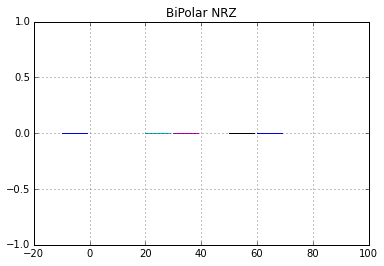

In [2]:
from __future__ import division
%matplotlib inline
from matplotlib.pyplot import plot,grid,title,show

#Figure 6.1(c):Discrete PAM Signals Generation
# [3].BiPolar NRZ
#page 235
x = [0, 1, 1, 0, 0, 1 ,0 ,0 ,1 ,1]
binary_negative = [-1, -1 ,-1 ,-1 ,-1 ,-1 ,-1 ,-1 ,-1, -1]
binary_zero = [0 ,0 ,0 ,0 ,0, 0 ,0 ,0 ,0 ,0]
binary_positive = [1, 1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1]
L = len(x)
L1 = len(binary_negative)
total_duration = L*L1
#plotting
for i  in range(0,L):
  if(x[i]==0):
    plot(range(i*L-L,i*L),binary_zero)
    
  elif((x[i]==1) and (x[i-1]!=1)):
    plot(range(i*L-L,i*L),binary_positive)
    
  else:
    plot(range(i*L-L,i*L),binary_negative)
    
grid()
title('BiPolar NRZ')
show()

## Example6.2 Page 241

In [2]:
from __future__ import division

b = [0,0,1,0,1,1,0]##input binary sequence:precoder input
a = [1^b[0]]
if(a[0]==1):
  a_volts=[1]

for k in range(1,len(b)):
  a.append(a[(k-1)]^b[(k)])
  if(a[(k)]==1):
    a_volts.append(1)
  else:
    a_volts.append(-1)
  
print 'Precoder output in binary form:'
for aa in a:
    print aa,'\t', 
print '\n'
print 'Precoder output in volts:'
for bb in a_volts:
    print bb,'\t',
print '\n'
#Duobinary coder output in volts
c= [1+ a_volts[0]]
for k in range(1,len(a)):
  c.append(a_volts[(k-1)]+a_volts[(k)])
print 'Duobinary coder output in volts:'
for cc in c:
    print cc,'\t',
print '\n'    
#Duobinary decoder output  by applying decision rule
b_r=[]
for k in range(0,len(c)):
  if(abs(c[(k)])>1):
    b_r.append(0)
  else:
    b_r.append(1)
print 'Recovered original sequence at detector oupupt:'
for brr in b_r:
    print brr,'\t',

Precoder output in binary form:
1 	1 	0 	0 	1 	0 	0 	

Precoder output in volts:
1 	1 	-1 	-1 	1 	-1 	-1 	

Duobinary coder output in volts:
2 	2 	0 	-2 	0 	0 	-2 	

Recovered original sequence at detector oupupt:
0 	0 	1 	0 	1 	1 	0 	

## Example6.3 page 246 

In [3]:
from __future__ import division
#for generating bipolar format
#Refer Table 6.4

x = [0,1,1,0,1,0,0,0,1,1]##input binary sequence:precoder input
y= [1]
for k in range(1,len(x)+1):
  y.append(x[(k-1)]^y[(k-1)])

y_delay = y[0:-1]
print 'Modulo-2 adder output:'
for yy in y:
    print yy,'\t',
print ''    
print 'Delay element output:'
for yyy in y_delay:
    print yyy,'\t',
print ''   
z=[]
for k in range(0,len(y_delay)):
  z.append(y_delay[k])
print 'differential encoder bipolar output in volts:'
for zz in z:
    print zz,'\t',

Modulo-2 adder output:
1 	1 	0 	1 	1 	0 	0 	0 	0 	1 	0 	
Delay element output:
1 	1 	0 	1 	1 	0 	0 	0 	0 	1 	
differential encoder bipolar output in volts:
1 	1 	0 	1 	1 	0 	0 	0 	0 	1 	

## Example 6.4 Page 247

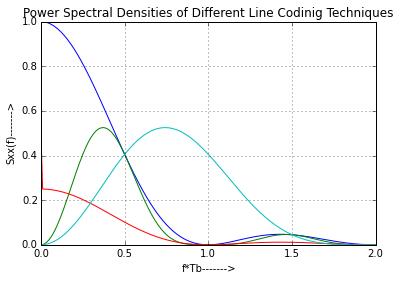

In [4]:
from __future__ import division
from numpy import arange,sinc,sin,pi
%matplotlib inline
from matplotlib.pyplot import plot,grid,title,show,xlabel,ylabel



#Different Line Coding Techniques
#[1].NRZ Polar Format [2].NRZ Bipolar format
#[3].NRZ Unipolar format [4]. Manchester format

#[1]. NRZ Polar format
a = 1 # The Amplitude value
fb = 1 # The bit rate
Tb = 1/fb#  #bit duration
f = arange(0,1/(100*Tb)+2/Tb,1/(100*Tb))
Sxxf_NRZ_P=[]
Sxxf_NRZ_BP=[]
Sxxf_NRZ_UP=[]
Sxxf_Manch=[]
for i in range(0,len(f)):
  Sxxf_NRZ_P.append((a**2)*Tb*(sinc(f[i]*Tb)**2))
  Sxxf_NRZ_BP.append((a**2)*Tb*((sinc(f[i]*Tb))**2)*((sin(pi*f[i]*Tb))**2))
  if (i==0):
    Sxxf_NRZ_UP.append((a**2)*(Tb/4)*((sinc(f[i]*Tb))**2)+(a**2)/4)
  else:
    Sxxf_NRZ_UP.append((a**2)*(Tb/4)*((sinc(f[i]*Tb))**2))
 
  Sxxf_Manch.append((a**2)*Tb*(sinc(f[i]*Tb/2)**2)*(sin(pi*f[i]*Tb/2)**2))

    

#Plotting
plot(f,Sxxf_NRZ_P)
plot(f,Sxxf_NRZ_BP)
plot(f,Sxxf_NRZ_UP)
plot(f,Sxxf_Manch)
xlabel('f*Tb------->')
ylabel('Sxx(f)------->')
title('Power Spectral Densities of Different Line Codinig Techniques')
grid()
show()
#Result
#Enter the Amplitude value:1
#Enter the bit rate:1 

## Example 6.6 page 249

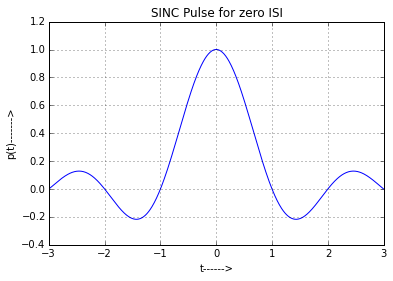

In [4]:
from __future__ import division
from numpy import arange,sinc,sin,pi
%matplotlib inline
from matplotlib.pyplot import plot,grid,title,show,xlabel,ylabel


#Figure 6.6(b): Ideal Solution for Intersymbol Interference
rb = 1 # The bit rate
Bo = rb/2#
t =arange(-3,1/100+3,1/100)
x = sinc(2*Bo*t)
plot(t,x)
xlabel('t------>')#
ylabel('p(t)------->')#
title('SINC Pulse for zero ISI')
grid()
show()

## Example 6.7 page 250

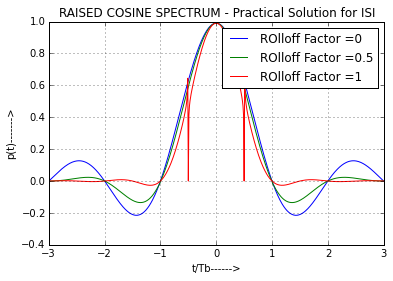

In [19]:
from __future__ import division
from numpy import arange,sinc,sin,pi
%matplotlib inline
from matplotlib.pyplot import plot,grid,title,show,xlabel,ylabel,legend

#Figure6.7(b):Practical Solution for Intersymbol Interference
#Raised Cosine Spectrum

rb = 1 # The bit rate
Tb =1/rb#
t =arange(-3,1/100+3,1/100)
Bo = rb/2#
Alpha =0#      #Intialized to zero
x =t/Tb#
p=zeros([3,len(t)])
for j in range(0,3):
  for i in range(0,len(t)):
    if((j==2) and ((t[i]==0.5) or (t[i]==-0.5))):
        p[j,i] = sinc(2*Bo*t[i])
    else:
        num =  sinc(2*Bo*t[i])*cos(2*pi*Alpha*Bo*t[i])
        den =   1-16*(Alpha**2)*(Bo**2)*(t[i]**2)+0.01
        p[j,i]= num/den
    
  
  Alpha = Alpha+0.5#

    
plot(t,p[0,:])
plot(t,p[1,:])
plot(t,p[2,:])
xlabel('t/Tb------>')
ylabel('p(t)------->')
title('RAISED COSINE SPECTRUM - Practical Solution for ISI')
legend(['ROlloff Factor =0','ROlloff Factor =0.5','ROlloff Factor =1'])
grid()
show()
#Result
#Enter the bit rate:1
        

## Example 6.9 Page 254

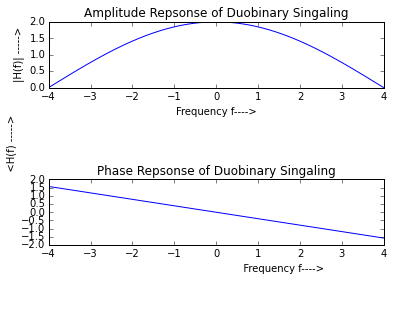

In [24]:
from __future__ import division
from numpy import arange,sinc,sin,pi
%matplotlib inline
from matplotlib.pyplot import plot,grid,title,show,xlabel,ylabel


#Caption:Frequency response of duobinary conversion filter
#Figure6.9:Frequency Response of Duobinary Conversion filter
#(a)Amplitude Response
#(b)Phase Response
rb =  8 # the bit rate
Tb =1/rb#  #Bit duration
f = arange(-rb/2,1/100+rb/2,1/100)
Amplitude_Response = [abs(2*cos(pi*ff*Tb)) for ff in f]
Phase_Response = [-(pi*ff*Tb) for ff in f]
subplot(3,1,1)
plot(f,Amplitude_Response)
xlabel('Frequency f---->')
ylabel('|H(f)| ----->')
title('Amplitude Repsonse of Duobinary Singaling')
subplot(3,1,3)
plot(f,Phase_Response)
xlabel('                                           Frequency f---->')
ylabel('                                            <H(f) ----->')
title('Phase Repsonse of Duobinary Singaling')
show()

## Example 6.15 page 259

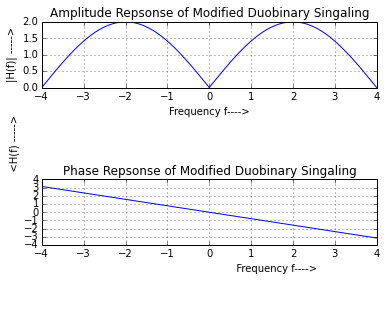

In [3]:
from __future__ import division
%matplotlib inline
from matplotlib.pyplot import plot,grid,title,xlabel,ylabel,show,legend,subplot
from numpy import arange,cos,pi,sinc,sin


#Caption:Frequency response of modified duobinary conversion filter
#Figure 6.15: Frequency Response of Modified duobinary conversion filter
#(a)Amplitude Response
#(b)Phase Response
rb =  8# the bit rate
Tb =1/rb#  #Bit duration
f = arange(-rb/2,1/100+rb/2,1/100)
Amplitude_Response = [abs(2*sin(2*pi*ff*Tb)) for ff in f]
Phase_Response = [-(2*pi*ff*Tb) for ff in f]
subplot(3,1,1)
plot(f,Amplitude_Response)
xlabel('Frequency f---->')
ylabel('|H(f)| ----->')
title('Amplitude Repsonse of Modified Duobinary Singaling')
grid()
subplot(3,1,3)
plot(f,Phase_Response)
xlabel('                                           Frequency f---->')
ylabel('                                            <H(f) ----->')
title('Phase Repsonse of Modified Duobinary Singaling')
grid()
show()